Задание **Ultra Lite**


Используя шаблон ноутбука, напишите четыре нейронки для распознавания писателей. Для этого выполните следующее:

1. Загрузите данные и разделите на слова.
2. Создайте словарь и превратите данные в индексы.
3. Превратите данные в обучающую выборку.
4. Напишите нейронные сети.

Четыре нейронки, которые нужно написать:
1. Embedding + Dense сеть.
2. Embedding + LSTM сеть.
3. Embedding + Conv1D сеть.
4. Embedding + сложная сеть из Dense, LSTM и Conv1D.

Для выполнения задания можно смотреть в ноутбук задания, но код желательно писать своими руками, а не копировать.

# Подготовка данных

In [ ]:
# Для начала загрузим все необходимые библиотеки для работы 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras import utils
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from google.colab import files

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Загрузка данных

In [ ]:
# Создадим функцию для чтения файла с возратом нового файла без переноса на следующую строку
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text

In [ ]:
# Определим классы писателей. Всего будет шесть
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

In [ ]:
# Создадим 2 пустых списка (обучающий и проверочный), для последующего заполнения

trainText = []
testText = []

In [ ]:
# Добавим в эти два пустых списка обучающие и тестовые выборки.
# Пройдемся двумя циклами для заполнения списков. Так чтобы каждый i элемент в обучающей выборке соответствовал j элементу в тестовой.
for i in className:                                 
  for j in os.listdir('/content/'):                     
    if i in j:                                       
      if 'Обучающая' in j:                           
        trainText.append(readText('/content/' +j))      
        print (j, 'добавлен в обучающую выборку')   
      if 'Тестовая' in j:                           
        testText.append(readText('/content/' +j))      
        print (j, 'добавлен в тестовую выборку')     
  print ()                       

(О. Генри) Обучающая.txt добавлен в обучающую выборку
(О. Генри) Тестовая.txt добавлен в тестовую выборку

(Стругацкие) Тестовая.txt добавлен в тестовую выборку
(Стругацкие) Обучающая.txt добавлен в обучающую выборку

(Булгаков) Тестовая.txt добавлен в тестовую выборку
(Булгаков) Обучающая.txt добавлен в обучающую выборку

(Клиффорд Саймак) Тестовая.txt добавлен в тестовую выборку
(Клиффорд Саймак) Обучающая.txt добавлен в обучающую выборку

(Макс Фрай) Тестовая.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая.txt добавлен в обучающую выборку

(Рэй Брэдберри) Обучающая.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая.txt добавлен в тестовую выборку



# Обработка данных

In [ ]:
# Преобразуем текстовые данные в числовые

# Определим максимльное число индексов для обучения
maxWordsCount = 20000

# Разбиение текста и превращение в матрицу цифровых значений
tokenizer = Tokenizer (num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', char_level=False, oov_token='unknow')

# Собираем словарь частотности
tokenizer.fit_on_texts(trainText)

In [ ]:
# Преобразововаем текст в последовательность индексов согласно словарю 
trainWordIndexes = tokenizer.texts_to_sequences(trainText)   # Обучающая
testWordIndexes = tokenizer.texts_to_sequences(testText)     # Тестовая

In [ ]:
# Посмотрим общую статистику.
print ("Статистика по обучающим текстам:\n")
sum_char = 0
sum_words = 0 

for i in range(nClasses):
  print (className[i], ' ', len(trainText[i]), "символов," , len(trainWordIndexes[i]), " слов")

for i in range(nClasses):  
  sum_char += len(trainText[i]) 
  sum_words += len(trainWordIndexes[i])
print ("\nВ сумме ", sum_char, " символов  и  ", sum_words, " слов")

print ("\n\n")
print ("Статистика по тестовым текстам:\n")
sum_char = 0
sum_words = 0 

for i in range(nClasses):
  print (className[i], ' ', len(testText[i]), "символов," , len(testWordIndexes[i]), " слов")

for i in range(nClasses):  
  sum_char += len(testText[i]) 
  sum_words += len(testWordIndexes[i])
print ("\nВ сумме ", sum_char, " символов  и ", sum_words, " слов")


Статистика по обучающим текстам:

О. Генри   1049517 символов, 160607  слов
Стругацкие   2042469 символов, 313012  слов
Булгаков   1765648 символов, 261465  слов
Саймак   1609507 символов, 251502  слов
Фрай   3700010 символов, 568533  слов
Брэдберри   1386454 символов, 214454  слов

В сумме  11553605  символов  и   1769573  слов



Статистика по тестовым текстам:

О. Генри   349662 символов, 53238  слов
Стругацкие   704846 символов, 108621  слов
Булгаков   754376 символов, 113906  слов
Саймак   318811 символов, 50360  слов
Фрай   1278191 символов, 196731  слов
Брэдберри   868673 символов, 132524  слов

В сумме  4274559  символов  и  655380  слов


# Функции для создания выборок: обучающей и проверочной

In [ ]:
# Для этого создадим несколько вспомогательных функций

# Функция для разделения на короткие векторы
def getSetFromIndexes (wordIndexes, xLen, step):      
  xSample = []                                       
  wordsLen = len(wordIndexes)                       
  index = 0                                           


  while (index + xLen <= wordsLen):                     
    xSample.append(wordIndexes[index:index + xLen])   
    index += step                                    

  return xSample

In [ ]:
# Функция для формирования обучающей и проверочной выборок
def createSetsMultiClasses(wordIndexes, xLen, step):

  # Создаем выборки из индексов для каждого из 6 классов
  nClasses = len(wordIndexes)
  classesXSamples = []
  for i in wordIndexes:
    classesXSamples.append(getSetFromIndexes(i,xLen,step))

  # Один общий список
  xSamples = []
  ySamples = []

  for t in range(nClasses):                               # В нашем случаи цикл от 0 до 6 (кол-во классов)
    xT = classesXSamples[t]                                # На каждой итерации цикла берем очередной нарезанный текст одного из класса

    for i in range (len(xT)):                             # Циклом проходимся по каждому его окну
      xSamples.append(xT[i])                              # Добавляем в общий список обучающей выборке
      ySamples.append(utils.to_categorical(t, nClasses))  # И соответствующий вектор класса

    # Первод в массив numpy
  xSamples = np.array(xSamples)                           
  ySamples = np.array(ySamples)    


  return (xSamples, ySamples)

# Подготовка данных 

In [ ]:
# Базовые параметры
xLen = 1000          # Длина отрезка текста(окно)
step = 100           # Шаг разбиения на обучающие вектора

In [ ]:
# Формирование обучающей и тестовой выборок 

xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)

In [ ]:
# Посмотрим на результат
print ("xTrain: ",xTrain.shape)
print ("yTrain: ",yTrain.shape)
print ("xTest: ", xTest.shape)
print ("yTest: ", yTest.shape)

xTrain:  (17640, 1000)
yTrain:  (17640, 6)
xTest:  (6498, 1000)
yTest:  (6498, 6)


**Так как в данной работе мы будем использовать слой Embedding, то не требуется переводить xTrain и yTrain в векторы из 0 и 1, как для Bag of Words.**

# Функции для распознавания проверочной выборки

In [ ]:
# Переведем тестовую выборку в удобные для распознавания размеры

def createTestMultiClasses (wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  xTest6Classes = []
  #xTest6Classes01 = []
  for i in wordIndexes:
    sample = (getSetFromIndexes(i, xLen, step))
    #xTest6Classes01.append(tokenizer.sequences_to_matrix(sample))
    xTest6Classes.append(np.array(getSetFromIndexes(i,xLen,step)))
  return xTest6Classes

In [ ]:
# Немного переделал следующую функцию, чтобы она возвращала средний процент распознавания для каждого автора и общий процент. Чтобы эти данные можно занести в таблицу

In [ ]:
# Функция для распознавания тестовой выборки и вывод результата
def recognizeMultiClass(model, xTest, modelName):

  print ("Нейронная сеть: ", modelName)

  val = []
  pred = []
  totalSumRec = []

  # Циклом прохоим по всем классам
  for i in range(nClasses):
    currPred = model.predict(xTest[i])    # Получение результат распознавания класса по блокам слов длинной xLen
    pred.append(currPred)
    currOut = np.argmax(currPred, axis=1)

    # Подсчет процента распознавания каждого класса

    evVal = []
    sumRec = []

    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))

    totalSumRec.append(sumRec[i])

    # Определение какой класс за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)

    # Вывод результата распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)

  # Вывод среднего процента по всем классам
  sumVal = 0
  sumCount = 0
  lenXtest = []
    
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]

  average = int(100*sumVal/sumCount)
  print("Средний процент распознавания ", average, "%")
  print()
  return sumVal/sumCount, val, average

In [ ]:
# Подгоним форму тестовых классов под функцию  recognizeMultiClass

xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

# Функция: вывода summary и схемы нейронной сети и графика обучения

In [ ]:
# Функция вывода summary и схемы нейронной сети
def showModel(model):
  model.summary()
  print ("\n\n")
  return plot_model(model, dpi=80, show_shapes=True)

In [ ]:
# Функция вывода графиков
def chart(hist):
  plt.figure(figsize=(10,5))
  plt.plot(hist.history['loss'], label = 'Доля ошибки  на обучающем наборе')
  plt.plot(hist.history['val_loss'], label = 'Доля ошибки на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля ошибки')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,5))
  plt.plot(hist.history['accuracy'], label = 'Доля верных ответов на обучающем наборе')
  plt.plot(hist.history['val_accuracy'], label = 'Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

In [ ]:
# Функция для сохранения результата обучения. С последующей записью в таблицу pandas. 
def table(his):
  dct = []  
  # В цикле проходимся по всем значениям из history                                                  
  for v in his.history.values():                                        
    dct.append (v)                                            # Результат выгружаются в словарь.                                                                
  result = np.array(dct)                                      # Переводим в numpy массив. 
  return result

In [ ]:
# Создание таблицы pandas, c данными заголовками 
df = pd.DataFrame(columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy', 'О. Генри', 'Стругацкие', 'Булгаков', 'Саймак', 'Фрай', 'Брэдберри', 'Средний процент распознавания'])

# Эксперименты

## 1. Embedding + Dense сеть

### Simple RNN

In [ ]:
modelSimpleRNN = Sequential()

modelSimpleRNN.add(Embedding(maxWordsCount, 5, input_length=xLen))
modelSimpleRNN.add(SpatialDropout1D(0.2))
modelSimpleRNN.add(BatchNormalization())

modelSimpleRNN.add(SimpleRNN(20))
modelSimpleRNN.add(Dropout(0.2))

modelSimpleRNN.add(Dense(6, activation='softmax'))

modelSimpleRNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 5)           100000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1000, 5)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1000, 5)           20        
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 20)                520       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 126       
Total params: 100,666
Trainable params: 100,656
Non-trainable params: 10
_________________________________________________

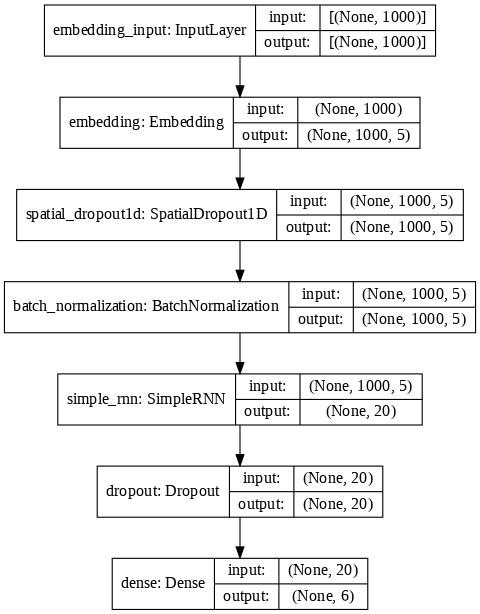

In [ ]:
showModel(modelSimpleRNN)    # Вывод параметров модели с помощью функции

In [ ]:
# Обучение нейронной сети
historyRNN = modelSimpleRNN.fit(xTrain, yTrain, epochs=50, batch_size=504, validation_data=(xTest,yTest))  

Epoch 1/50
35/35 [==============================] - 22s 538ms/step - loss: 1.9447 - accuracy: 0.1819 - val_loss: 1.7534 - val_accuracy: 0.2919
Epoch 2/50
35/35 [==============================] - 18s 526ms/step - loss: 1.7788 - accuracy: 0.2492 - val_loss: 1.7587 - val_accuracy: 0.3013
Epoch 3/50
35/35 [==============================] - 18s 520ms/step - loss: 1.6849 - accuracy: 0.3164 - val_loss: 1.8343 - val_accuracy: 0.3013
Epoch 4/50
35/35 [==============================] - 18s 525ms/step - loss: 1.5795 - accuracy: 0.3743 - val_loss: 1.9411 - val_accuracy: 0.3099
Epoch 5/50
35/35 [==============================] - 19s 543ms/step - loss: 1.4903 - accuracy: 0.4150 - val_loss: 1.9459 - val_accuracy: 0.3032
Epoch 6/50
35/35 [==============================] - 19s 541ms/step - loss: 1.4371 - accuracy: 0.4335 - val_loss: 1.9814 - val_accuracy: 0.3192
Epoch 7/50
35/35 [==============================] - 19s 539ms/step - loss: 1.3742 - accuracy: 0.4604 - val_loss: 2.0302 - val_accuracy: 0.3287

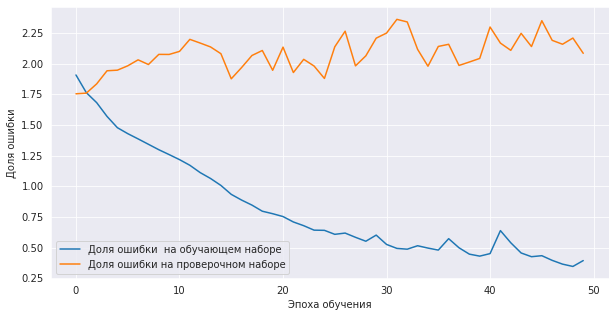

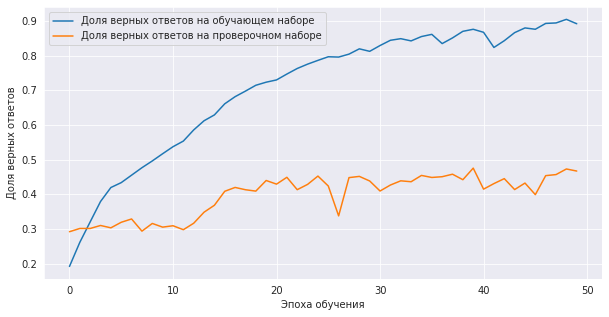

In [ ]:
# Посмотрим на графики обучения на обучающей и проверочной выбороки
chart(historyRNN)

In [ ]:
# Посмотрим на результат на тестовой выборке
pred, val, average = recognizeMultiClass(modelSimpleRNN, xTest6Classes, "SimpleRNN")

Нейронная сеть:  SimpleRNN
О. Генри  распознано  15 % сеть считает, что это  Брэдберри ,  распознано НЕ ВЕРНО!
Стругацкие  распознано  48 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  48 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  37 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  59 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдберри  распознано  40 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!
Средний процент распознавания  46 %



In [ ]:
result = table(historyRNN)    # C помощью функции получаем значения на последней эпохе

# Заносим результат в таблицу
df.loc['Embedding + Dense(SimpleRNN)'] = [round(result[0][-1],4), round(result[1][-1]*100, 4), round(result[2][-1],4), round(result[3][-1]*100,4),
                                          int(val[0]*100), int(val[1]*100), int(val[2]*100), int(val[3]*100), int(val[4]*100), int(val[5]*100), average]

In [ ]:
df

,loss,accuracy,val_loss,val_accuracy,О. Генри,Стругацкие,Булгаков,Саймак,Фрай,Брэдберри,Средний процент распознавания
Embedding + Dense(SimpleRNN),0.3936,89.178,2.0834,46.6913,15.0,48.0,48.0,37.0,59.0,40.0,46.0


### GRU

In [ ]:
modelGRU = Sequential()
modelGRU.add(Embedding(maxWordsCount, 10, input_length=xLen))

modelGRU.add(SpatialDropout1D(0.2))
modelGRU.add(BatchNormalization())
modelGRU.add(GRU(80, dropout=0.2, recurrent_dropout=0.2, activation='relu'))

modelGRU.add(Dense(6,activation ='softmax'))

modelGRU.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 5)           100000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1000, 5)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1000, 5)           20        
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 20)                520       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 126       
Total params: 100,666
Trainable params: 100,656
Non-trainable params: 10
_________________________________________________

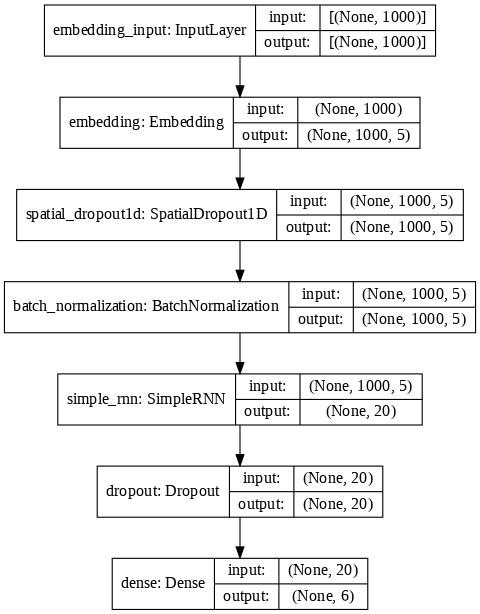

In [ ]:
showModel(modelSimpleRNN)    # Вывод параметров модели с помощью функции

In [ ]:
historyGRU = modelGRU.fit(xTrain, yTrain, epochs = 100, batch_size=504, validation_data=(xTest, yTest))  

Epoch 1/100
35/35 [==============================] - 53s 1s/step - loss: 1.7283 - accuracy: 0.3127 - val_loss: 1.7785 - val_accuracy: 0.1890
Epoch 2/100
35/35 [==============================] - 51s 1s/step - loss: 1.6347 - accuracy: 0.3327 - val_loss: 1.7723 - val_accuracy: 0.1930
Epoch 3/100
35/35 [==============================] - 51s 1s/step - loss: 1.5649 - accuracy: 0.3891 - val_loss: 1.7846 - val_accuracy: 0.1768
Epoch 4/100
35/35 [==============================] - 51s 1s/step - loss: 1.5145 - accuracy: 0.4377 - val_loss: 1.7947 - val_accuracy: 0.1864
Epoch 5/100
35/35 [==============================] - 51s 1s/step - loss: 1.2353 - accuracy: 0.5125 - val_loss: 1.8065 - val_accuracy: 0.1714
Epoch 6/100
35/35 [==============================] - 51s 1s/step - loss: 1.6501 - accuracy: 0.5733 - val_loss: 1.8136 - val_accuracy: 0.1642
Epoch 7/100
35/35 [==============================] - 50s 1s/step - loss: 0.9614 - accuracy: 0.6346 - val_loss: 1.8319 - val_accuracy: 0.1644
Epoch 8/100
3

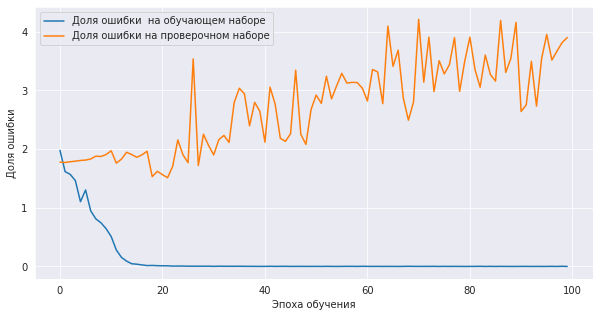

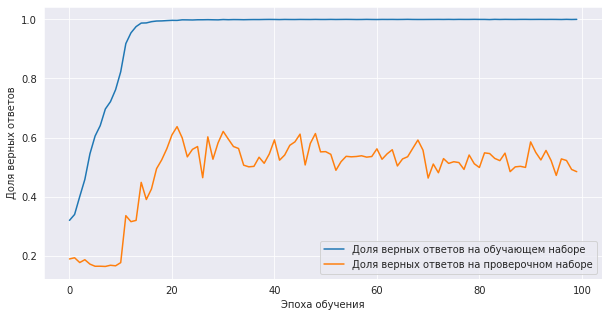

In [ ]:
# Посмотрим на графики обучения на обучающей и проверочной выбороки
chart(historyGRU)

In [ ]:
# Посмотрим на результат на тестовой выборке
pred, val, average = recognizeMultiClass(modelGRU, xTest6Classes, "modelGRU")

Нейронная сеть:  modelGRU
О. Генри  распознано  90 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  31 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Булгаков  распознано  1 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Саймак  распознано  45 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Фрай  распознано  79 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдберри  распознано  40 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Средний процент распознавания  48 %



In [ ]:
result = table(historyGRU)    # C помощью функции получаем значения на последней эпохе

# Заносим результат в таблицу
df.loc['Embedding + Dense(GRU)'] = [round(result[0][-1],4), round(result[1][-1]*100, 4), round(result[2][-1],4), round(result[3][-1]*100,4),
                                          int(val[0]*100), int(val[1]*100), int(val[2]*100), int(val[3]*100), int(val[4]*100), int(val[5]*100), average]

# 2.Embedding + LSTM сеть

In [ ]:
modelLSTM = Sequential()

modelLSTM.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelLSTM.add(SpatialDropout1D(0.4))
modelLSTM.add(BatchNormalization())

modelLSTM.add(Bidirectional(LSTM(8, return_sequences=True)))
modelLSTM.add(LSTM(8))
modelLSTM.add(Dropout(0.3))
modelLSTM.add(BatchNormalization())

modelLSTM.add(Dense(200, activation='relu'))
modelLSTM.add(Dropout(0.3))
modelLSTM.add(BatchNormalization())

modelLSTM.add(Dense(6, activation='softmax'))

modelLSTM.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 50)          1000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 1000, 50)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1000, 50)          200       
_________________________________________________________________
bidirectional (Bidirectional (None, 1000, 16)          3776      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8)                

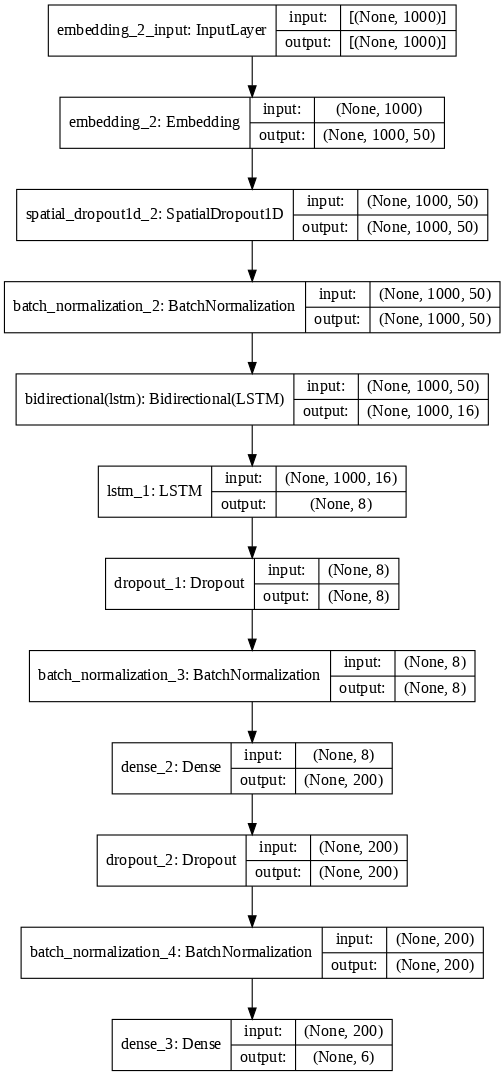

In [ ]:
showModel(modelLSTM)

In [ ]:
historyLSTM = modelLSTM.fit(xTrain, yTrain, epochs=100, batch_size=504, validation_data=(xTest, yTest))

Epoch 1/100
35/35 [==============================] - 41s 241ms/step - loss: 2.0990 - accuracy: 0.1986 - val_loss: 1.7356 - val_accuracy: 0.3013
Epoch 2/100
35/35 [==============================] - 8s 217ms/step - loss: 1.8205 - accuracy: 0.2893 - val_loss: 1.7349 - val_accuracy: 0.3013
Epoch 3/100
35/35 [==============================] - 8s 215ms/step - loss: 1.5982 - accuracy: 0.3743 - val_loss: 1.7451 - val_accuracy: 0.3013
Epoch 4/100
35/35 [==============================] - 8s 216ms/step - loss: 1.2962 - accuracy: 0.4837 - val_loss: 1.8060 - val_accuracy: 0.1657
Epoch 5/100
35/35 [==============================] - 7s 214ms/step - loss: 1.1117 - accuracy: 0.5661 - val_loss: 1.8978 - val_accuracy: 0.1661
Epoch 6/100
35/35 [==============================] - 7s 215ms/step - loss: 0.9668 - accuracy: 0.6187 - val_loss: 2.0046 - val_accuracy: 0.1676
Epoch 7/100
35/35 [==============================] - 7s 215ms/step - loss: 0.8862 - accuracy: 0.6511 - val_loss: 2.0579 - val_accuracy: 0.167

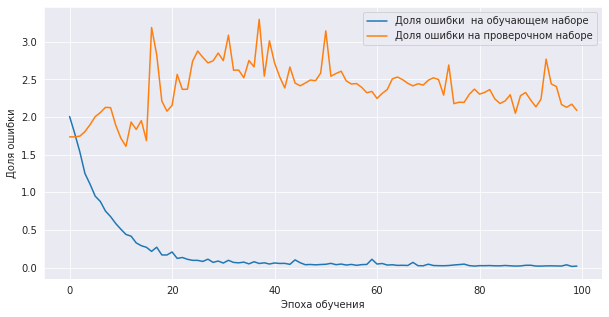

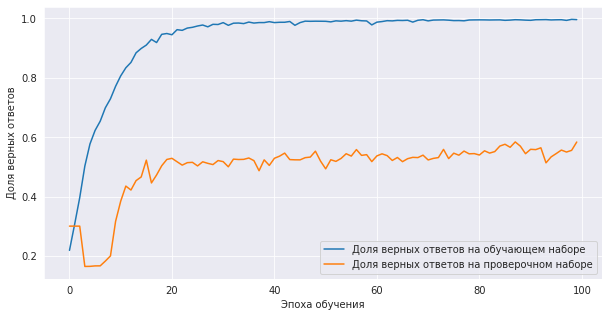

In [ ]:
# Посмотрим на графики обучения на обучающей и проверочной выбороки
chart(historyLSTM)

In [ ]:
# Посмотрим на результат на тестовой выборке
pred, val, average = recognizeMultiClass(modelLSTM, xTest6Classes, "modelLSTM")

Нейронная сеть:  modelLSTM
О. Генри  распознано  67 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  42 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  31 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  47 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  81 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдберри  распознано  61 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!
Средний процент распознавания  58 %



In [ ]:
result = table(historyLSTM)    # C помощью функции получаем значения на последней эпохе

# Заносим результат в таблицу
df.loc['Embedding + LSTM'] = [round(result[0][-1],4), round(result[1][-1]*100, 4), round(result[2][-1],4), round(result[3][-1]*100,4),
                                          int(val[0]*100), int(val[1]*100), int(val[2]*100), int(val[3]*100), int(val[4]*100), int(val[5]*100), average]

# 3. Embedding + Conv1D сеть

In [ ]:
modelConv1D = Sequential()

modelConv1D.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelConv1D.add(SpatialDropout1D(0.3))
modelConv1D.add(BatchNormalization())

modelConv1D.add(Conv1D(20, 5, activation='relu', padding='same'))
modelConv1D.add(Conv1D(20, 5, activation='relu'))

modelConv1D.add(MaxPooling1D(2))
modelConv1D.add(Dropout(0.3))
modelConv1D.add(BatchNormalization())

modelConv1D.add(Flatten())
modelConv1D.add(Dense(6, activation='softmax'))

modelConv1D.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 10)          200000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 1000, 10)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1000, 10)          40        
_________________________________________________________________
conv1d (Conv1D)              (None, 1000, 20)          1020      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 20)           2020      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 498, 20)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 498, 20)          

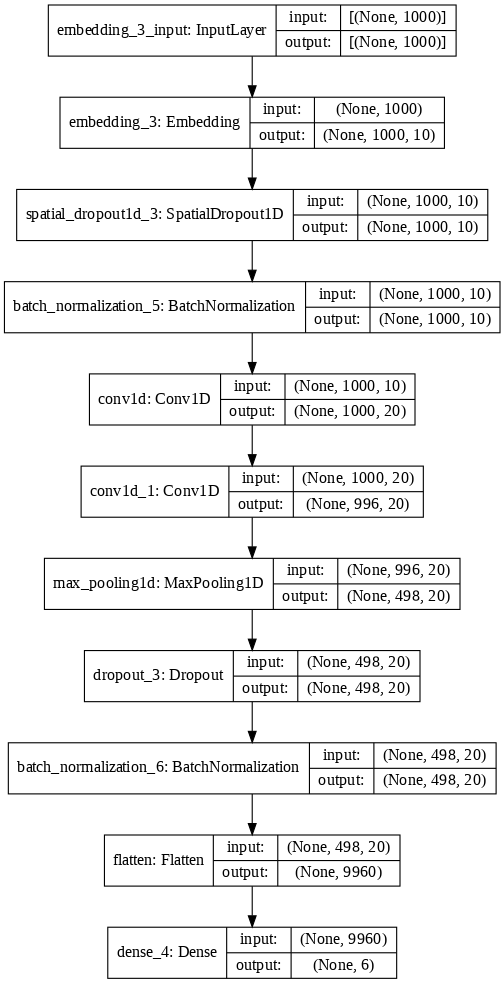

In [ ]:
showModel(modelConv1D)

In [ ]:
historyConv1D = modelConv1D.fit(xTrain, yTrain, epochs=100, batch_size=504, validation_data=(xTest, yTest))

Epoch 1/100
35/35 [==============================] - 4s 55ms/step - loss: 2.1508 - accuracy: 0.2690 - val_loss: 1.9118 - val_accuracy: 0.1657
Epoch 2/100
35/35 [==============================] - 2s 49ms/step - loss: 0.8310 - accuracy: 0.6800 - val_loss: 2.0919 - val_accuracy: 0.0789
Epoch 3/100
35/35 [==============================] - 2s 48ms/step - loss: 0.1887 - accuracy: 0.9386 - val_loss: 2.1202 - val_accuracy: 0.3013
Epoch 4/100
35/35 [==============================] - 2s 50ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 2.2459 - val_accuracy: 0.3146
Epoch 5/100
35/35 [==============================] - 2s 50ms/step - loss: 0.0351 - accuracy: 0.9901 - val_loss: 2.3060 - val_accuracy: 0.1534
Epoch 6/100
35/35 [==============================] - 2s 49ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 3.0150 - val_accuracy: 0.3613
Epoch 7/100
35/35 [==============================] - 2s 49ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 2.9418 - val_accuracy: 0.4140
Epoch 

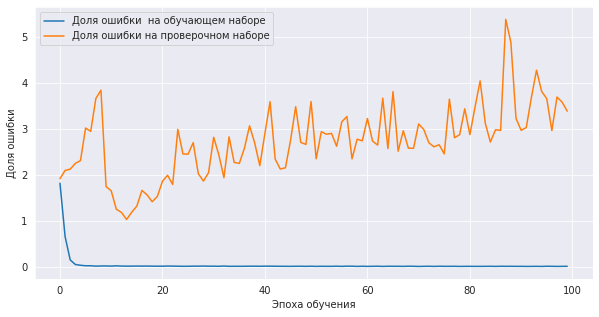

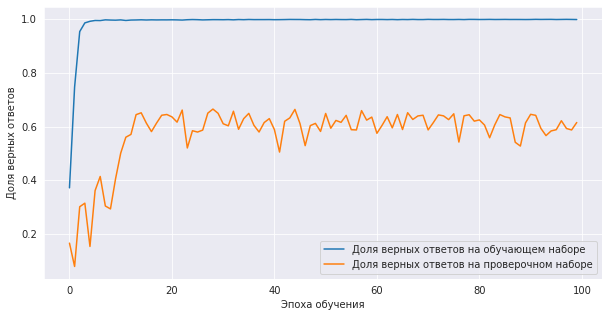

In [ ]:
# Посмотрим на графики обучения на обучающей и проверочной выбороки
chart(historyConv1D)

In [ ]:
# Посмотрим на результат на тестовой выборке
pred, val, average = recognizeMultiClass(modelConv1D, xTest6Classes, "modelConv1D")

Нейронная сеть:  modelConv1D
О. Генри  распознано  45 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  34 % сеть считает, что это  Фрай ,  распознано НЕ ВЕРНО!
Булгаков  распознано  78 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  76 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  93 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдберри  распознано  22 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Средний процент распознавания  61 %



In [ ]:
result = table(historyConv1D)    # C помощью функции получаем значения на последней эпохе

# Заносим результат в таблицу
df.loc['Embedding + Conv1D'] = [round(result[0][-1],4), round(result[1][-1]*100, 4), round(result[2][-1],4), round(result[3][-1]*100,4),
                                          int(val[0]*100), int(val[1]*100), int(val[2]*100), int(val[3]*100), int(val[4]*100), int(val[5]*100), average]

# 4. Embedding + сложная сеть из Dense, LSTM и Conv1D

In [ ]:
model_Dense_LSTM_Conv1D = Sequential()

model_Dense_LSTM_Conv1D.add(Embedding(maxWordsCount, 10, input_length=xLen))
model_Dense_LSTM_Conv1D.add(SpatialDropout1D(0.3))

model_Dense_LSTM_Conv1D.add(LSTM(4, return_sequences=True))
model_Dense_LSTM_Conv1D.add(Dense(100, activation='relu'))

model_Dense_LSTM_Conv1D.add(Conv1D(20, 5, activation='relu'))

model_Dense_LSTM_Conv1D.add(LSTM(4, return_sequences=True))
model_Dense_LSTM_Conv1D.add(Dropout(0.3))
model_Dense_LSTM_Conv1D.add(BatchNormalization())

model_Dense_LSTM_Conv1D.add(Conv1D(20, 5, activation='relu'))
model_Dense_LSTM_Conv1D.add(Conv1D(20, 5, activation='relu'))
model_Dense_LSTM_Conv1D.add(MaxPooling1D(2))

model_Dense_LSTM_Conv1D.add(Dropout(0.3))
model_Dense_LSTM_Conv1D.add(BatchNormalization())

model_Dense_LSTM_Conv1D.add(Flatten())
model_Dense_LSTM_Conv1D.add(Dense(6, activation='softmax'))

model_Dense_LSTM_Conv1D.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 10)          200000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 1000, 10)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1000, 4)           240       
_________________________________________________________________
dense_5 (Dense)              (None, 1000, 100)         500       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 996, 20)           10020     
_________________________________________________________________
lstm_3 (LSTM)                (None, 996, 4)            400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 996, 4)           

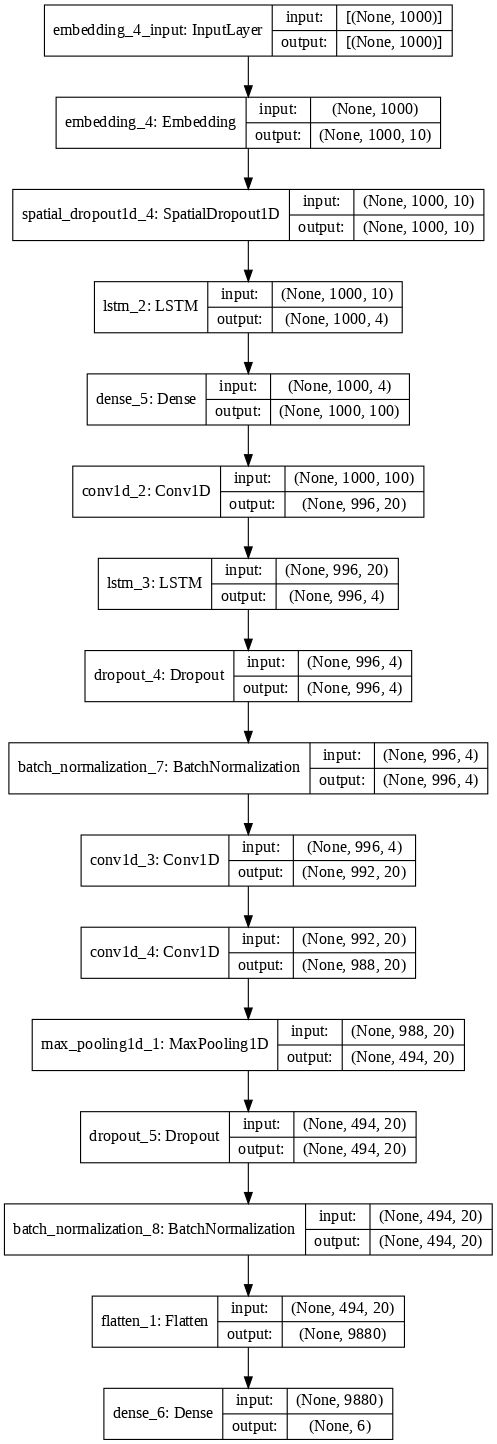

In [ ]:
showModel(model_Dense_LSTM_Conv1D)

In [ ]:
history_Dense_LSTM_Conv1D = model_Dense_LSTM_Conv1D.fit(xTrain, yTrain, epochs=100, batch_size=504, validation_data=(xTest, yTest))

Epoch 1/100
35/35 [==============================] - 10s 182ms/step - loss: 1.7290 - accuracy: 0.2996 - val_loss: 2.1063 - val_accuracy: 0.1657
Epoch 2/100
35/35 [==============================] - 6s 161ms/step - loss: 0.6727 - accuracy: 0.7234 - val_loss: 3.1769 - val_accuracy: 0.1657
Epoch 3/100
35/35 [==============================] - 6s 161ms/step - loss: 0.1615 - accuracy: 0.9462 - val_loss: 3.5834 - val_accuracy: 0.1657
Epoch 4/100
35/35 [==============================] - 6s 161ms/step - loss: 0.0715 - accuracy: 0.9780 - val_loss: 3.8959 - val_accuracy: 0.1657
Epoch 5/100
35/35 [==============================] - 6s 162ms/step - loss: 0.0253 - accuracy: 0.9927 - val_loss: 4.3726 - val_accuracy: 0.1657
Epoch 6/100
35/35 [==============================] - 6s 162ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 4.1795 - val_accuracy: 0.1657
Epoch 7/100
35/35 [==============================] - 6s 162ms/step - loss: 0.0167 - accuracy: 0.9950 - val_loss: 4.5719 - val_accuracy: 0.202

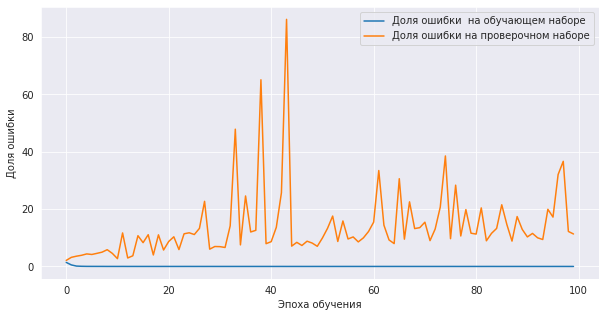

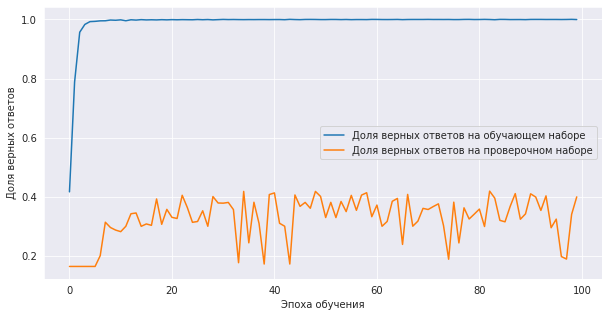

In [ ]:
# Посмотрим на графики обучения на обучающей и проверочной выбороки
chart(history_Dense_LSTM_Conv1D)

In [ ]:
# Посмотрим на результат на тестовой выборке
pred, val, average = recognizeMultiClass(model_Dense_LSTM_Conv1D, xTest6Classes, "Dense_LSTM_Conv1D")

Нейронная сеть:  Dense_LSTM_Conv1D
О. Генри  распознано  8 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Стругацкие  распознано  18 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Булгаков  распознано  81 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  17 % сеть считает, что это  Стругацкие ,  распознано НЕ ВЕРНО!
Фрай  распознано  61 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдберри  распознано  11 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Средний процент распознавания  40 %



In [ ]:
result = table(history_Dense_LSTM_Conv1D)    # C помощью функции получаем значения на последней эпохе

# Заносим результат в таблицу
df.loc['Embedding + Dense_LSTM_Conv1D'] = [round(result[0][-1],4), round(result[1][-1]*100, 4), round(result[2][-1],4), round(result[3][-1]*100,4),
                                          int(val[0]*100), int(val[1]*100), int(val[2]*100), int(val[3]*100), int(val[4]*100), int(val[5]*100), average]

In [ ]:
df

,loss,accuracy,val_loss,val_accuracy,О. Генри,Стругацкие,Булгаков,Саймак,Фрай,Брэдберри,Средний процент распознавания
Embedding + Dense(SimpleRNN),0.3936,89.1780,2.0834,46.6913,15.0,48.0,48.0,37.0,59.0,40.0,46.0
Embedding + Dense(GRU),0.0003,99.9830,3.9012,48.4303,90.0,31.0,1.0,45.0,79.0,40.0,48.0
Embedding + LSTM,0.0188,99.5805,2.0858,58.4180,67.0,42.0,31.0,47.0,81.0,61.0,58.0
Embedding + Conv1D,0.0055,99.8413,3.3819,61.4958,45.0,34.0,78.0,76.0,93.0,22.0,61.0
Embedding + Dense_LSTM_Conv1D,0.0020,99.9150,11.3262,40.0585,8.0,18.0,81.0,17.0,61.0,11.0,40.0


# Выводы:

1. Не смотря на разницу в **3-21 %** разные нейронные сети показали средний результат работы с данной задачей
2. Изменяя архитекуру и гиперпараметры -9ейронной сети использующие Embedding слой можно добиться показаний в **60-70%** Текст, выделенный полужирным шрифтом Текст, выделенный полужирным шрифтом, что не удовлетворяет желанию в **90-95%**.
3. Нейронная сеть с Bag of Word для данной задачи показала лучший результат чем Embedding.  Но для этого и нужно проводить разные и многочисленные эксперименты.
3. Так же можно сказать и про время обучения:
    - **Conv1D** самая быстрообучаемая сеть. Можно проверять много гипотиз. 
    - Дольше всех обучалась сеть с **GRU**.
4. Полезно использовать **summary** и схематическое представление модели нейронной сети. А так же понимать какой будет вход и выход на каждом слое. 
5. Использовать графики после обучения сети так же необходимо. Чтобы увидеть как ведет себя точно и ошибка во время обучения. 
6. При сравнении результатов разных моделей и гипотиз также удобно использовать таблицу **pandas**. 
7. Хорошая практика самостоятельно писать код. 